# Introductory Machine Learning Pipeline

Regression tasks are tasks where the ultimate goal of the model is to return a numeric value by making a prediction. 

**Objective:** As an example, in this case we will do a regression to calculate the covid cases that will occur in future weeks based on the data of past weeks and the current week.

**Pipeline:** As a pipeline for machine learning tasks, we will be following the instructions based on <a href="https://www.ibm.com/docs/es/spss-modeler/saas?topic=dm-crisp-help-overview">CRISP-DM</a> methodology:

<img src="https://www.ibm.com/docs/es/SS3RA7_sub/modeler_crispdm_ddita/clementine/images/crisp_process.jpg" alt="Crisp dm methodology" width="250"/>


1. **Business Understanding**: First, we must understand that data science and therefore machine learning are techniques that require an understanding of the problem and the formation of multidisciplinary teams. That is why this initial phase is crucial for the success of any project in data science. In this phase we will be in charge of obtaining all the possible information about the project, this implies:

- Domain of the problem
- Related works
- Business objectives
- Possible data sources
- Success criteria of the project
- Possible solutions and techniques

2. **Data Understanding**: The second phase is the data understanding phase. In this phase we will assume that we have already passed through the data collection stage. In this phase we will take care of understanding the data we have available and its possible use to solve the problem. In this phase, the data is:
- Analyzed by visualizing the dataset, shape, variables, ...
- Genearating different statistics from the dataset, like mean, min, max, sd
- And generating plots from the datasets.

3. **Data Preparation**: Once we have analyzed the data, we know what the strengths and weaknesses of the dataset are, therefore we must move on to a data preparation phase, which consists of:
- Data cleaning
- Variable selection
- Format changes
- Data imputation

4. **Modeling**: The modeling stage consists of the generation of multiple machine learning and statistical models designed to solve the specific task using the data collected in the previous phases. In this phase, the models are also evaluated by testing the models generated under a previously defined metric and it is seen which model has the best performance.

5. **Evaluation**: Once the modeling phase has been completed, starts the evaluation phase, where unlike the previous phase, not only the model is evaluated, but also the business objectives defined in the first phase and if the models generated truth fulfills the objective of the project.

**Note**: The phases of this methodology are not static, once a phase is completed you can come back to that phase again if it's necessary. Follow the rows of the previous image as reference. 

# 1. Business Understanding

The pandemic caused by covid-19 has shown that both governments and health institutions are not prepared for a health crisis on the level of the pandemic caused by covid-19.

However, the crisis has also brought different solutions and ways to deal with the pandemic using data science and machine learning techniques. Some examples of this is the creation of early warning systems that help health entities to propose strategies for the preparation and management of the pandemic and hospital resources.

For the creation of these models, many types of data and models can be used, such as autoregressive models that use data from the same disease in past days or weeks to predict future behavior, for which they can be used from traditional statistical techniques of analysis of time series (such as ARIMA or SARIMA), machine learning techniques using regression models (such as linear regression, random forest, Support Vector Regressor (SVR), etc.) or more advanced techniques such as deep learning for sequence analysis (Recurrent Neural Networks , Long-Short Termn-Memory (LSTM), Transformers, among others) [<a href="https://link.springer.com/article/10.1007/s13204-021-01868-7">1</a>, <a href="https://link.springer.com/article/10.1007/s42979-021-00774-7">2</a>].

Likewise, the possibility of using various data sources that can help in the construction of these models, making use of data such as those obtained by public and open sources such as newspapers, news, Google searches, among others, have proven to be effective in disease prediction [<a href="https://arxiv.org/abs/2004.04019">3</a>].

### Setup enviorment

In [1]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algebra operations
import numpy as np

# Machine learning models and preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Data Understanding

In this practice we will be using 2 datasets:

1. COVID-19 Cases in latam
2. COVID-19 mentions in news from Media Cloud

### For both datasets we will do the following:

1. Analyzing the original dataset (shape, variables, etc.)
2. Genearating different statistics from the dataset (mean, min, max, sd)
3. Data visualization using some plots.

In [5]:
""" 
This function checks if there are null values in the dataframe:
In case of not having null values, print: 'There aren't null values in the dataframe'
In case of having null values, print the columns with these values
"""
def null_values(df):
    nulos = df.isna().sum().any()
    if nulos == False:
        print("There aren't null values in the dataframe")
    else:
        print(df.isna().sum()[df.isna().sum() == True])

### 2.1 COVID-19 Cases in latam

We can see that the file _"daily_covid_cases_latam.csv"_ has:

Columns:
- Location: Name of the country where covid-19 cases occured
- Dates from 2020-02-23 to 2022-05-26: Number of covid-19 cases in that day in that in each country

Rows:
- Each row is a different country

In [6]:
# Path to file
file_path = 'COVID_LATAM/Output/daily_covid_cases_latam.csv'

# Read file
covid_cases_latam = pd.read_csv(file_path)

# Check if there are null values
null_values(covid_cases_latam)

# Print first 5 rows
covid_cases_latam.head()

There aren't null values in the dataframe


,location,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
0,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,607.730,557.086,0.000,324.123,0.000,405.154,0.000,810.307,577.344
1,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,953.541,0.000,0.000,0.000,0.000
2,Bahamas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.622,55.428,123.452,221.710,161.244,156.205,73.064,131.011,0.000,317.449
3,Barbados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1630.125,1400.726,1289.502,1077.481,0.000,1637.076,451.847,1160.899,851.558,806.373
4,Belize,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,264.253,197.572,288.950,214.860,0.000,0.000,488.992,325.994,306.237,187.694


In [7]:
# Check data types
covid_cases_latam.dtypes

location       object
2020-02-23    float64
2020-02-24    float64
2020-02-25    float64
2020-02-26    float64
               ...   
2022-05-22    float64
2022-05-23    float64
2022-05-24    float64
2022-05-25    float64
2022-05-26    float64
Length: 825, dtype: object

In [8]:
# Describe the dataset
covid_cases_latam.describe()

,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
count,32.000000,32.0,32.0,32.000000,32.0,32.000000,32.000000,32.000000,32.0,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.003250,0.0,0.0,0.000156,0.0,0.000250,0.000875,0.024938,0.0,0.004063,...,250.273531,281.243375,208.875125,158.458031,64.220562,174.703156,371.740000,348.417969,365.373031,156.078937
std,0.018385,0.0,0.0,0.000884,0.0,0.001414,0.004133,0.086726,0.0,0.013673,...,563.174421,561.821531,359.397654,269.361214,158.757000,356.878452,1549.621268,661.917481,1072.473840,251.322430
min,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,7.483500,1.045000,29.356000,13.097000,0.000000,3.285000,5.546000,36.451500,19.141500,31.611500
75%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,157.281000,215.024000,307.006000,216.572500,13.788000,178.612750,109.775500,317.413250,276.969000,154.770500
max,0.104000,0.0,0.0,0.005000,0.0,0.008000,0.023000,0.364000,0.0,0.056000,...,2406.760000,2212.275000,1289.502000,1077.481000,731.014000,1637.076000,8812.282000,2627.916000,5985.701000,901.729000


## 2.2 COVID-19 mentions in news from Media Cloud

We can see that the file _"covid-19_attention_latam.csv"_ has:

Columns:

- date: Dates from 2020-01-01 to 2022-06-01 when the mentions of covid-19 occured
- count_Country Name: Represents the number of news media mentioning our topic.
- total_count_Country Name: Is the total number of news media published.
- ratio_Country Name: Indicates the proportion of news media that contain the word we are interested in.

Rows:
- Each row is a different date

In [9]:
# Path to file
file_path = 'Media_Cloud_Data/Attention _COVID-19_National/covid-19_attention_latam.csv'

# Read file
covid_media_cloud_latam = pd.read_csv(file_path)

# Convert date to datetime datatype
covid_media_cloud_latam.date = pd.to_datetime(covid_media_cloud_latam.date)

# Check if there are null values
null_values(covid_media_cloud_latam)

# Print first 5 rows
covid_media_cloud_latam.head()

There aren't null values in the dataframe


,date,count_Antigua and Barbuda,total_count_Antigua and Barbuda,ratio_Antigua and Barbuda,count_Argentina,total_count_Argentina,ratio_Argentina,count_Bahamas,total_count_Bahamas,ratio_Bahamas,...,ratio_Suriname,count_Trinidad and Tobago,total_count_Trinidad and Tobago,ratio_Trinidad and Tobago,count_Uruguay,total_count_Uruguay,ratio_Uruguay,count_Venezuela,total_count_Venezuela,ratio_Venezuela
0,2020-01-01,0,3,0.000,180,2699,0.066691,0,12,0.000000,...,0.058824,2,25,0.080000,9,158,0.056962,9,464,0.019397
1,2020-01-02,0,6,0.000,528,6319,0.083558,0,51,0.000000,...,0.000000,0,28,0.000000,17,314,0.054140,45,678,0.066372
2,2020-01-03,1,10,0.100,465,7209,0.064503,3,60,0.050000,...,0.240000,4,29,0.137931,24,363,0.066116,45,897,0.050167
3,2020-01-04,0,7,0.000,268,3805,0.070434,1,39,0.025641,...,0.142857,1,14,0.071429,18,192,0.093750,18,659,0.027314
4,2020-01-05,1,8,0.125,292,3771,0.077433,2,34,0.058824,...,0.222222,3,27,0.111111,18,203,0.088670,31,773,0.040103


In [10]:
# Check data types
covid_media_cloud_latam.dtypes

date                               datetime64[ns]
count_Antigua and Barbuda                   int64
total_count_Antigua and Barbuda             int64
ratio_Antigua and Barbuda                 float64
count_Argentina                             int64
                                        ...      
total_count_Uruguay                         int64
ratio_Uruguay                             float64
count_Venezuela                             int64
total_count_Venezuela                       int64
ratio_Venezuela                           float64
Length: 97, dtype: object

In [11]:
# Describe the dataset
covid_media_cloud_latam.describe()

,count_Antigua and Barbuda,total_count_Antigua and Barbuda,ratio_Antigua and Barbuda,count_Argentina,total_count_Argentina,ratio_Argentina,count_Bahamas,total_count_Bahamas,ratio_Bahamas,count_Barbados,...,ratio_Suriname,count_Trinidad and Tobago,total_count_Trinidad and Tobago,ratio_Trinidad and Tobago,count_Uruguay,total_count_Uruguay,ratio_Uruguay,count_Venezuela,total_count_Venezuela,ratio_Venezuela
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,...,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,8.817667,25.439411,0.332739,3163.884485,15558.562854,0.204927,26.937712,66.570781,0.388500,29.322763,...,0.272125,16.139298,78.983012,0.198213,115.952435,501.975085,0.232075,449.425821,1818.894677,0.252100
std,7.309457,17.955397,0.185969,1633.061302,7233.601749,0.067675,18.704334,35.920016,0.186629,15.676759,...,0.133356,10.318063,42.974848,0.099302,57.607791,197.927904,0.086026,234.978973,714.666883,0.128710
min,0.000000,0.000000,0.000000,23.000000,114.000000,0.047554,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,12.000000,0.214286,2151.000000,10711.500000,0.154281,10.000000,42.000000,0.259437,20.000000,...,0.189636,7.000000,42.000000,0.138525,82.000000,369.000000,0.174887,284.500000,1386.500000,0.167517
50%,7.000000,21.000000,0.333333,3203.000000,14681.000000,0.211622,25.000000,65.000000,0.393443,29.000000,...,0.260000,16.000000,79.000000,0.192771,115.000000,484.000000,0.228938,460.000000,1861.000000,0.248048
75%,13.000000,35.500000,0.444444,4311.500000,21503.500000,0.252008,40.000000,88.000000,0.520157,39.000000,...,0.347467,23.000000,109.500000,0.253745,150.000000,688.000000,0.291356,635.000000,2443.500000,0.323386
max,41.000000,87.000000,1.000000,9292.000000,29055.000000,0.413718,86.000000,224.000000,1.000000,82.000000,...,1.000000,49.000000,209.000000,1.000000,305.000000,857.000000,0.750000,1131.000000,3128.000000,1.000000


In [12]:
"""
Function to show histograms of the ratio of 3 countries

1. You must pass the list of the names of the 3 countries as they appear in the dataset after ratio_ ...
Example:
ratio_Antigua and Barbuda -> Antigua and Barbuda
ratio_Argentina -> Argentina
ratio_Bahamas -> Bahamas

2. With those names you form a list like this:
-> countries = ['Antigua and Barbuda', 'Argentina', 'Bahamas']

3. You call the function like this:
where df is the dataframe with the country data
show_histograms(df, countries)

Optional:
you can change the color by putting a color between the parentheses, like this:
-> show_histograms(countries, color='#fcba03')

In this case the color is '#fcba03', but you can also use the name, like:
-> show_histograms(countries, color='Blue')
"""

def mostrar_histogramas(df, paises, color='#fcba03'):

    plt.gcf().set_size_inches(15, 8)
    plt.subplot(1, 3, 1)

    sns.distplot(df[f'ratio_{paises[0]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[0]}')

    plt.subplot(1, 3, 2)
    sns.distplot(df[f'ratio_{paises[1]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[1]}')

    plt.subplot(1, 3, 3)
    sns.distplot(df[f'ratio_{paises[2]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[2]}')

    plt.show()

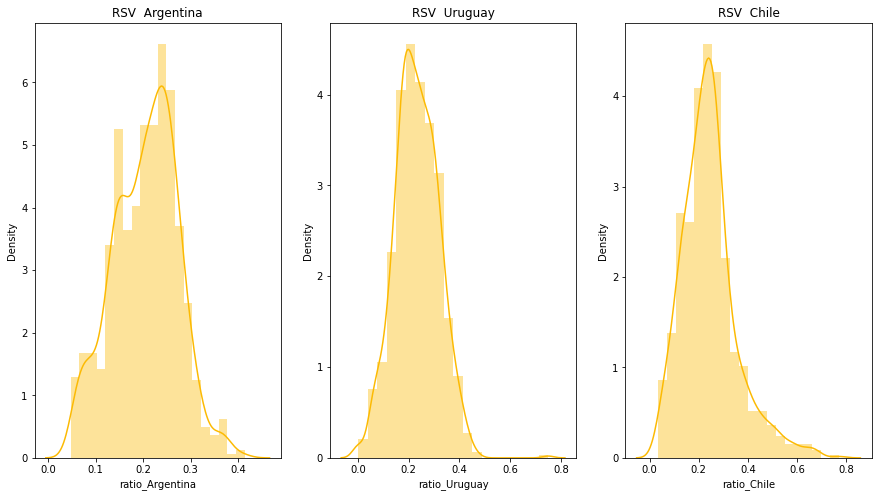

In [13]:
# We use the function to show the ratio of Argentina, Uruguay and Chile
paises = ['Argentina', 'Uruguay', 'Chile']
# Call the function using the list
mostrar_histogramas(covid_media_cloud_latam, paises)

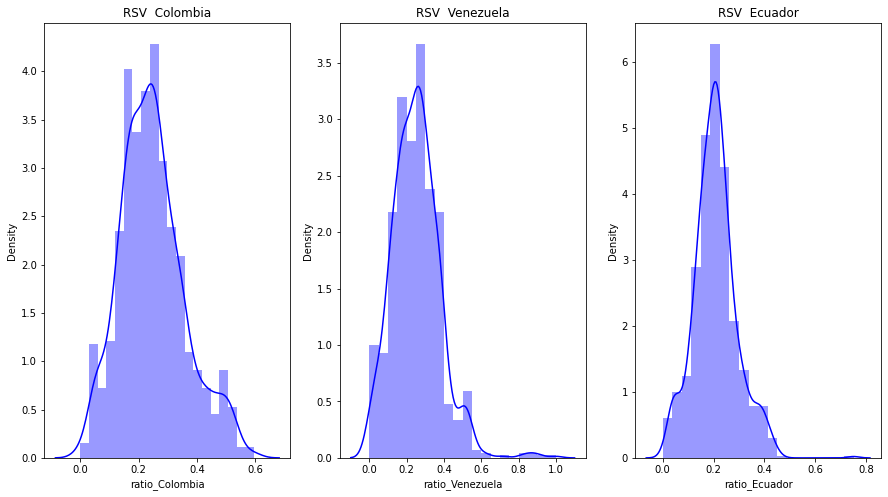

In [14]:
paises = ['Colombia', 'Venezuela', 'Ecuador']
mostrar_histogramas(covid_media_cloud_latam, paises, color= 'Blue')

# 3. Data Preparation

## 3.1. Data Selection for a specific country

As we have many countries in the dataset, for simplicity we will do this exercise only for the a specific country data

### 3.1.1. COVID Cases in a specific country

In [15]:
""" 
Function to read the file with covid-19 cases in a specific location

You call the function like this:
read_csv_country(file_path, location)

- where file_path is the path of the file with covid-19 cases
- and location is the country name that we want to analyze
"""
def read_csv_country(file_path, location):
    df = pd.read_csv(file_path, index_col=0)
    df = df[df.index == location]
    df = df.T
    df.columns.name = None
    if 'weekly' not in file_path:
        df.index = pd.to_datetime(df.index)
    else:
        df.index = pd.to_numeric(df.index)
    df = df.reset_index()
    df = df.rename(columns={'index':'date', location:'Cases'})
    
    return df

In [16]:
""" 
Function to plot the time series of the country
"""
def plot_cases(df):
    plt.figure(figsize = (12, 8))
    plt.plot(df.date, df.Cases, color ='blue')
    plt.xlabel('Date') 
    plt.ylabel('Covid Cases')
    plt.show()

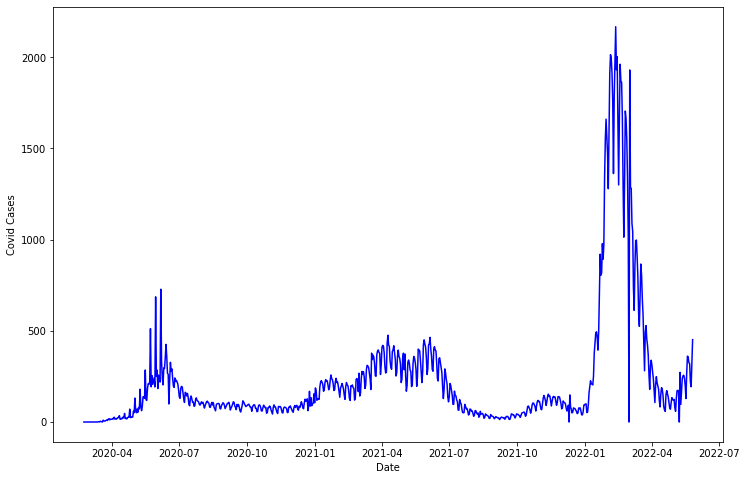

,date,Cases
0,2020-02-23,0.104
1,2020-02-24,0.000
2,2020-02-25,0.000
3,2020-02-26,0.000
4,2020-02-27,0.000
...,...,...
819,2022-05-22,319.742
820,2022-05-23,219.910
821,2022-05-24,193.365
822,2022-05-25,318.129


In [17]:
file_path = 'COVID_LATAM/Output/daily_covid_cases_latam.csv'
location = 'Chile'

# Use the function with the filepath and location
covid_cases = read_csv_country(file_path, location)
plot_cases(covid_cases)
covid_cases

### 3.1.2. Media Cloud Data in a specific country

In [18]:
""" 
Function to read the media cloud file with covid-19 mentions in a specific location.

You call the function like this:
read_mediacloud_csv(media_cloud_file_path, location, filter_df=False, option=3)

where: 
- "media_cloud_file_path" is the path of the file with covid-19 mentions from media cloud
- "location" is the country name that we want to analyze
- "filter_df" is False if we want to get the 3 variables (Count, Total_Count and Ratio) of that country
- If "filter_df" is True; then the argument "option" deffines wich variable to get:
    - Option = 0, means that the function will return just the column "Count"
    - Option = 1, means that the function will return just the column "total_count"
    - Option == Any other value, means that the function will return just the column "ratio"
"""

def read_mediacloud_csv(media_cloud_file_path, location, filter_df=False, option=3):
    # Read file
    df = pd.read_csv(media_cloud_file_path)
    
    # Add column names
    column_names = [column for column in df.columns if location in column]
    column_names.insert(0, 'date')
    if not filter_df:
        print(f'The selected columns are : {column_names}')
    
    # Filter based on location
    df = df[column_names]
    
    name = ''
    if filter_df:
        if option == 0:
            var = 'count'
            name = 'Count'
        elif option == 1:
            var = 'total_count'
            name = 'Total Count'
        else:
            name = 'Ratio'
            var = 'ratio'
        
        var = var + '_' + location
        column_names = [column for column in df.columns if var == column]  
        column_names.insert(0, 'date')
        print(f'The selected columns are : {column_names}')
        df = df[column_names]

    df.date = pd.to_datetime(df.date)
    
    plot_media_cloud(df, name)
    plot_histogram_media_cloud(df, name)
    return df

In [19]:
# Plot time series of the media cloud dataframe
def plot_media_cloud(df, name):
    plt.figure(figsize = (15, 8))
    
    columns = df.columns
    
    if len(columns) > 2:
        plt.subplot(1, 3, 1)
        sns.lineplot(df.date, df[columns[1]], color ='Blue', label='Count')
        
        plt.subplot(1, 3, 2)
        sns.lineplot(df.date, df[columns[2]], color ='Purple', label='Total Count')
        
        plt.subplot(1, 3, 3)
        sns.lineplot(df.date, df[columns[3]], color ='Red', label='Ratio')
        
    else:
        sns.lineplot(df.date, df[columns[1]], color ='Purple', label=name)
        
        
    plt.xlabel('Date') 
    plt.ylabel('Media Cloud Score')
    plt.legend()
    plt.show()

def plot_histogram_media_cloud(df, name):
    plt.figure(figsize = (12, 10))
    
    columns = df.columns
    
    if len(columns) > 2:
        
        plt.gcf().set_size_inches(15, 8)
        plt.subplot(1, 3, 1)
        sns.distplot(df[columns[1]], bins=20)
        
        plt.subplot(1, 3, 2)
        sns.distplot(df[columns[2]], bins=20)
        
        plt.subplot(1, 3, 3)
        sns.distplot(df[columns[3]], bins=20)
        
    else:
        sns.distplot(df[columns[1]], bins=20, color='Blue')
        
        
    plt.xlabel('Date') 
    plt.ylabel('Meida Cloud Score')
    plt.show()
    

The selected columns are : ['date', 'ratio_Chile']


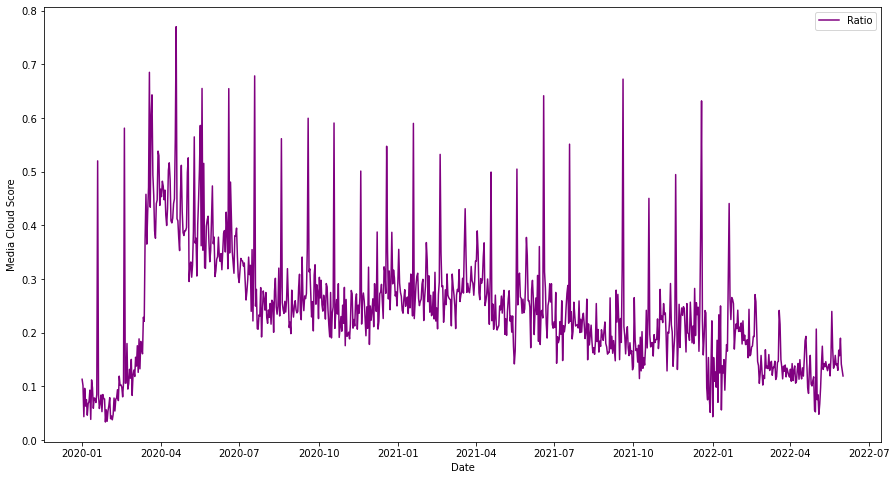

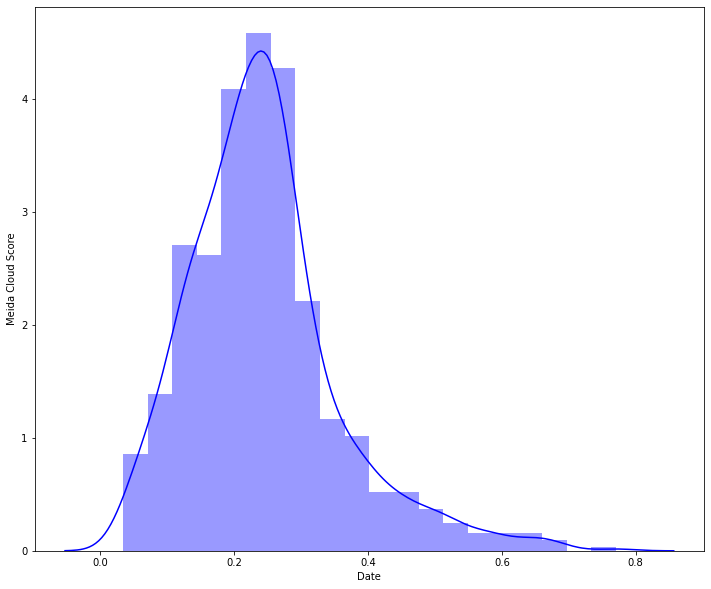

,date,ratio_Chile
0,2020-01-01,0.113343
1,2020-01-02,0.101708
2,2020-01-03,0.043671
3,2020-01-04,0.096467
4,2020-01-05,0.063380
...,...,...
878,2022-05-28,0.157265
879,2022-05-29,0.189899
880,2022-05-30,0.141608
881,2022-05-31,0.130366


In [20]:
# Plot media cloud dataframe
media_cloud_file_path = 'Media_Cloud_Data/Attention _COVID-19_National/covid-19_attention_latam.csv'

mediaCloud = read_mediacloud_csv(media_cloud_file_path, location, filter_df=True, option=3)
mediaCloud

## 3.2. Data preparation

We have the data and variables that we want to use to fit the model, now we have to prepare the data

### 3.2.1. Merge Dataframes
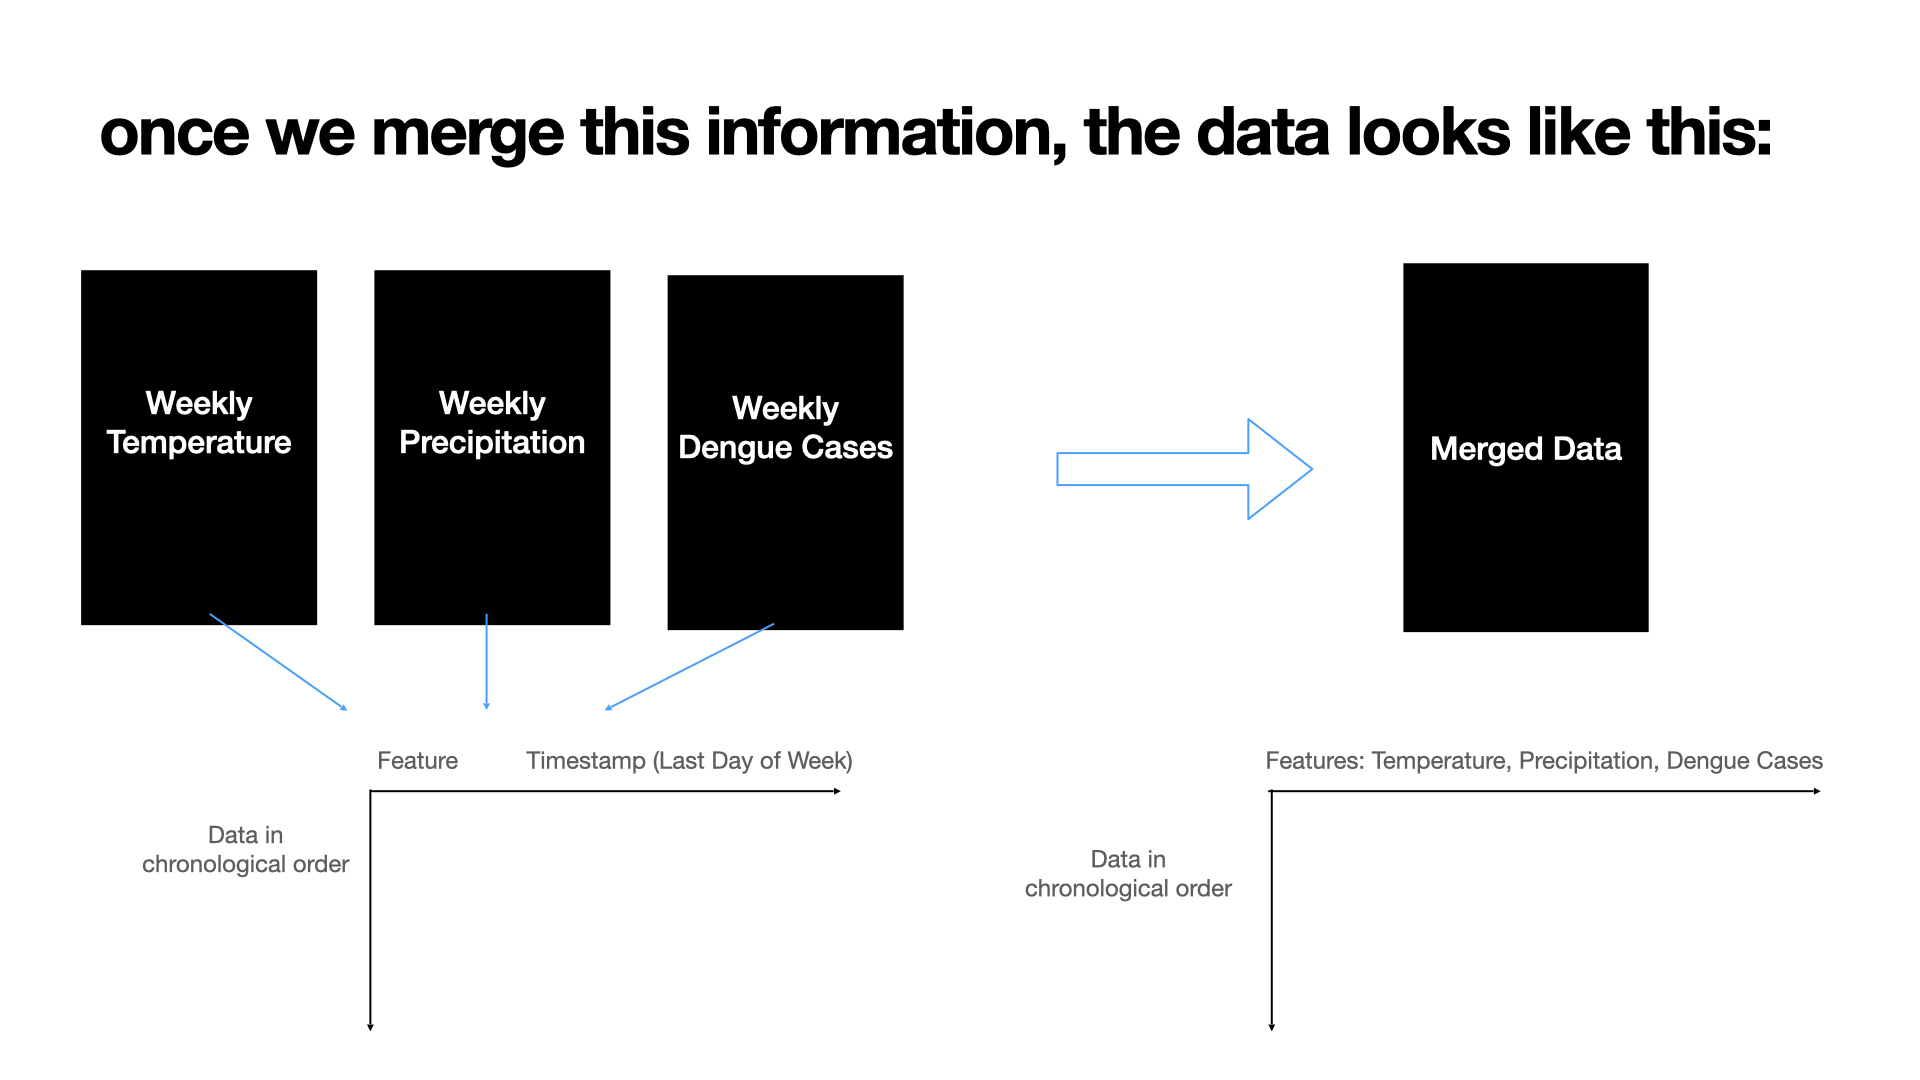

In [21]:
# Merge the two dataframes based on the date values
covid_df = mediaCloud.merge(covid_cases, how='inner', on="date")
covid_df.set_index('date', inplace=True)
covid_df

,ratio_Chile,Cases
date,,
2020-02-23,0.095047,0.104
2020-02-24,0.105221,0.000
2020-02-25,0.131921,0.000
2020-02-26,0.115470,0.000
2020-02-27,0.150381,0.000
...,...,...
2022-05-22,0.139450,319.742
2022-05-23,0.157856,219.910
2022-05-24,0.140227,193.365


## Regression task:

The regression task is a task where a numerical value is predicted. Therefore, to perform this task it is required a dataset that contains:

- **Features**: Variable or variables with information that could be used to predict the feature
- **Labels**: Variable to be predicted

In this case, we want to predict covid-19 cases using a **time series** analysis. So to do that we will use an auto regresive model, wich means that we are using the variable to predict in past to predict the same variable in the future and we will complement the features using media cloud data. So the dataset will be:

- **Features**: covid-19 cases in week t-n and Media Cloud Data in week t-n; where n >= 1
- **Labels**: covid-19 cases in week t


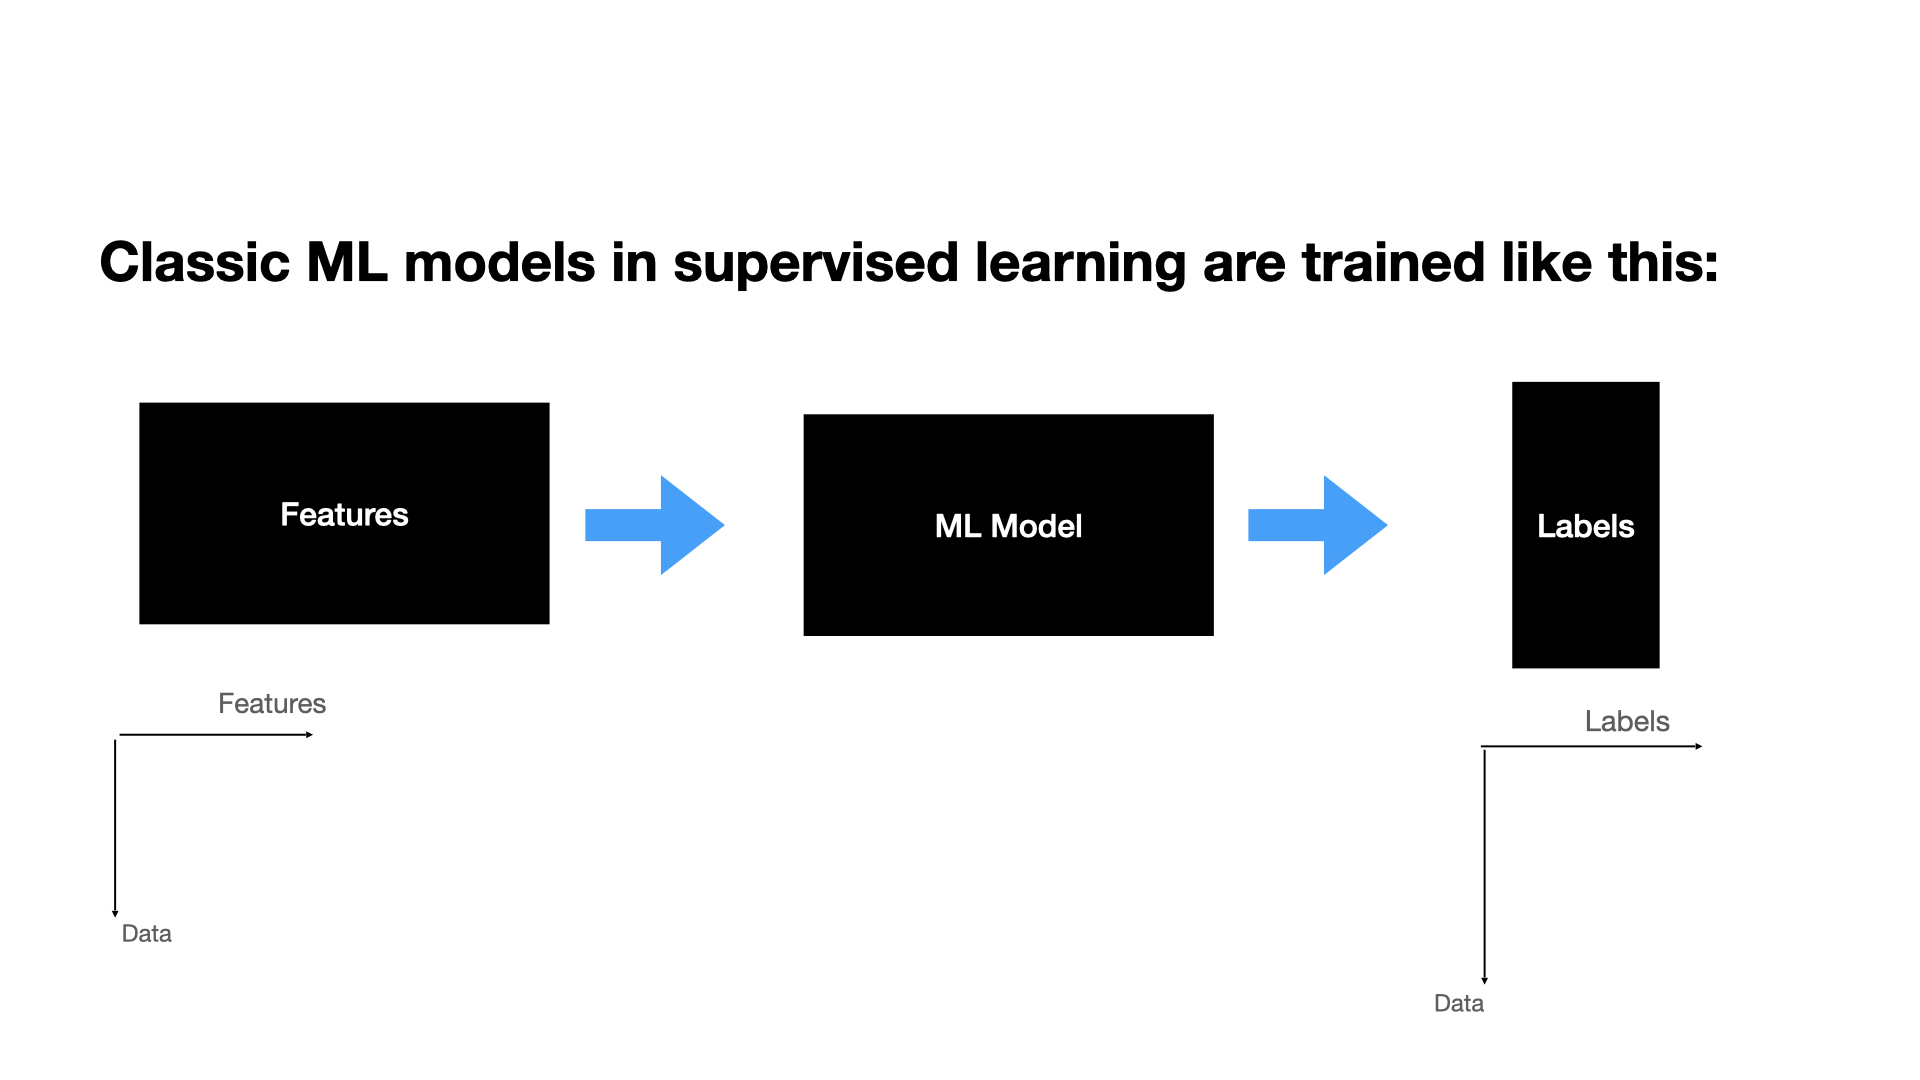

### Classic Time Series Approach

The classic method of time series is to decompose the original data into:

$$
y_{t} = S_{t} + T_{t} + R_t,
$$

where: 

$$
Trend:
T_{t}
$$

$$
Seasonality:
S_{t}
$$

$$
Noise: 
R_t,
$$

As we can see in the next block of code:

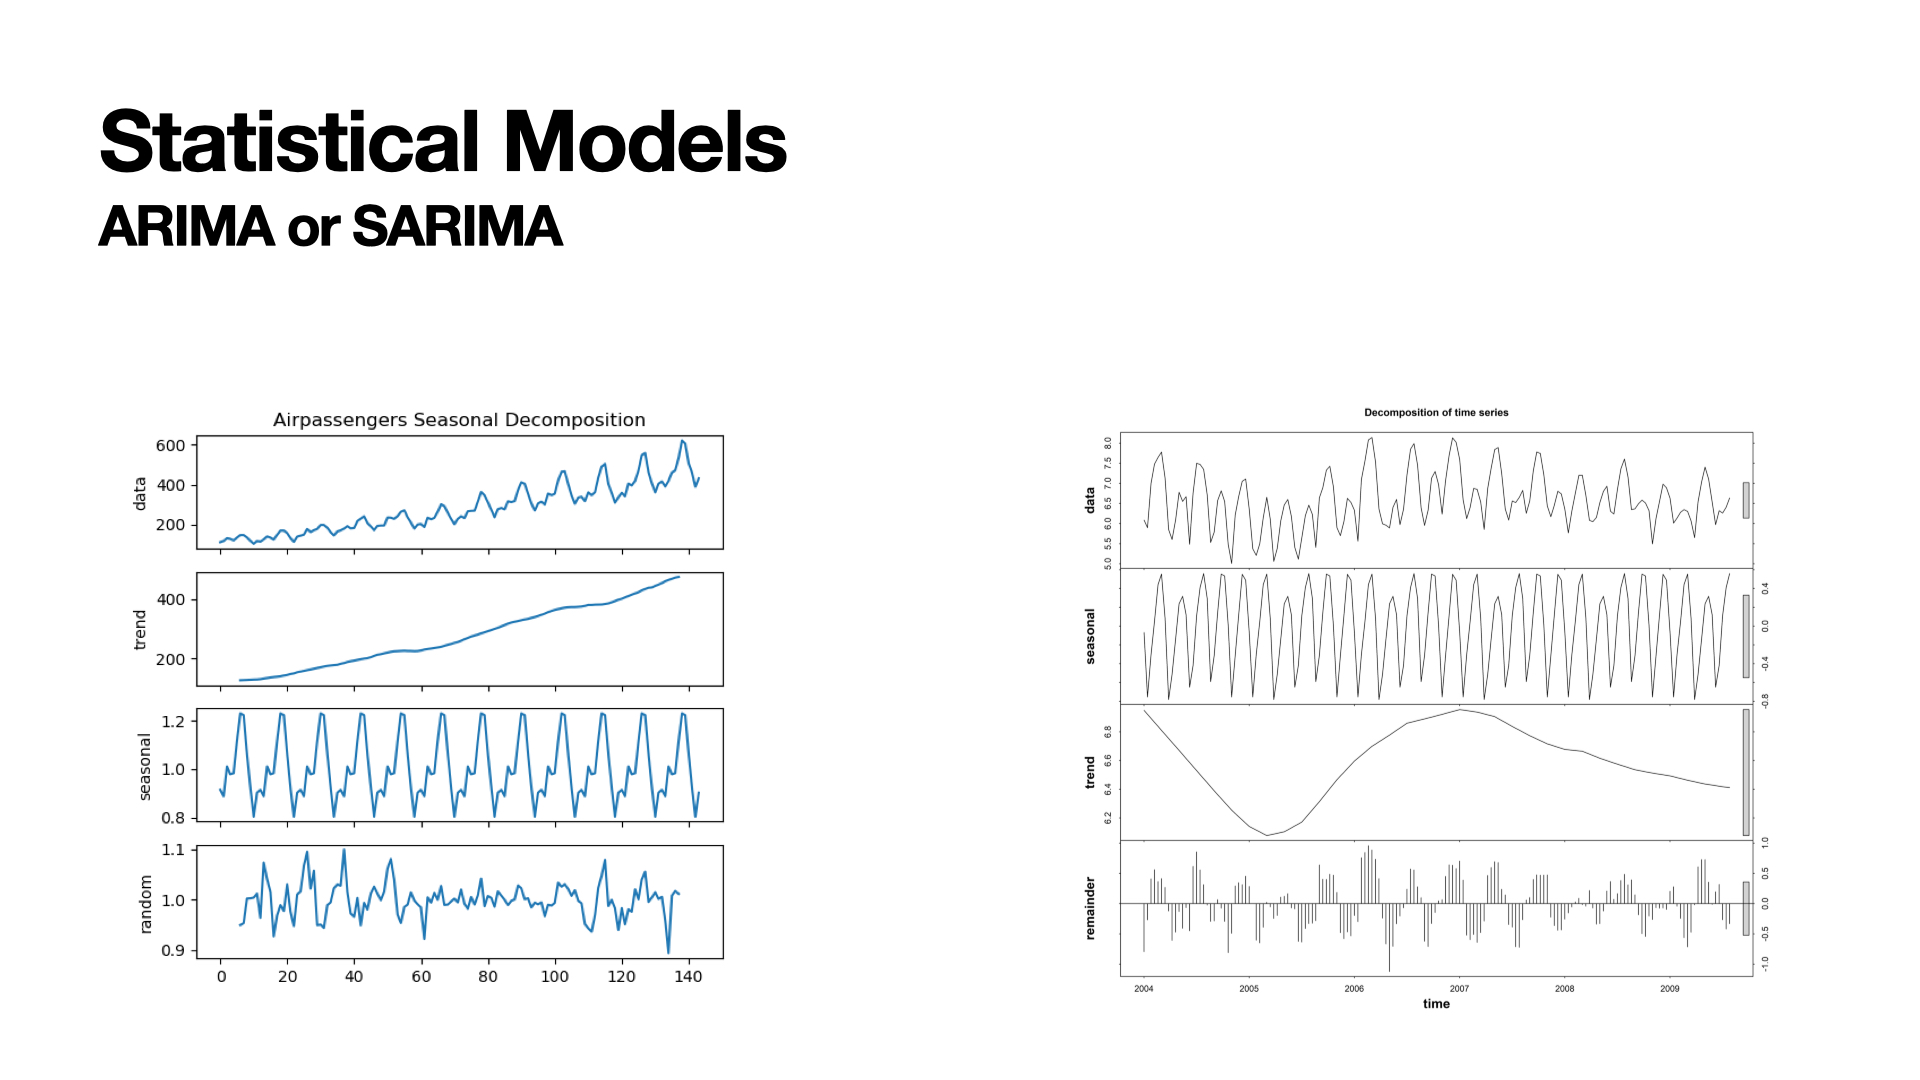

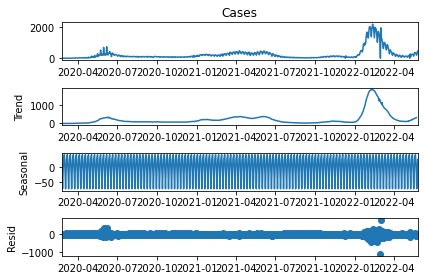

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

s_dec_cases = seasonal_decompose(covid_df.Cases, model = "adittive")

s_dec_cases.plot()
plt.show()

### Machine Learning Time Series Method
Using machine learning we can find other kind of relations more than just those 3 and also we can include other time series variables (in this case media cloud) or we could even include non time series variables.

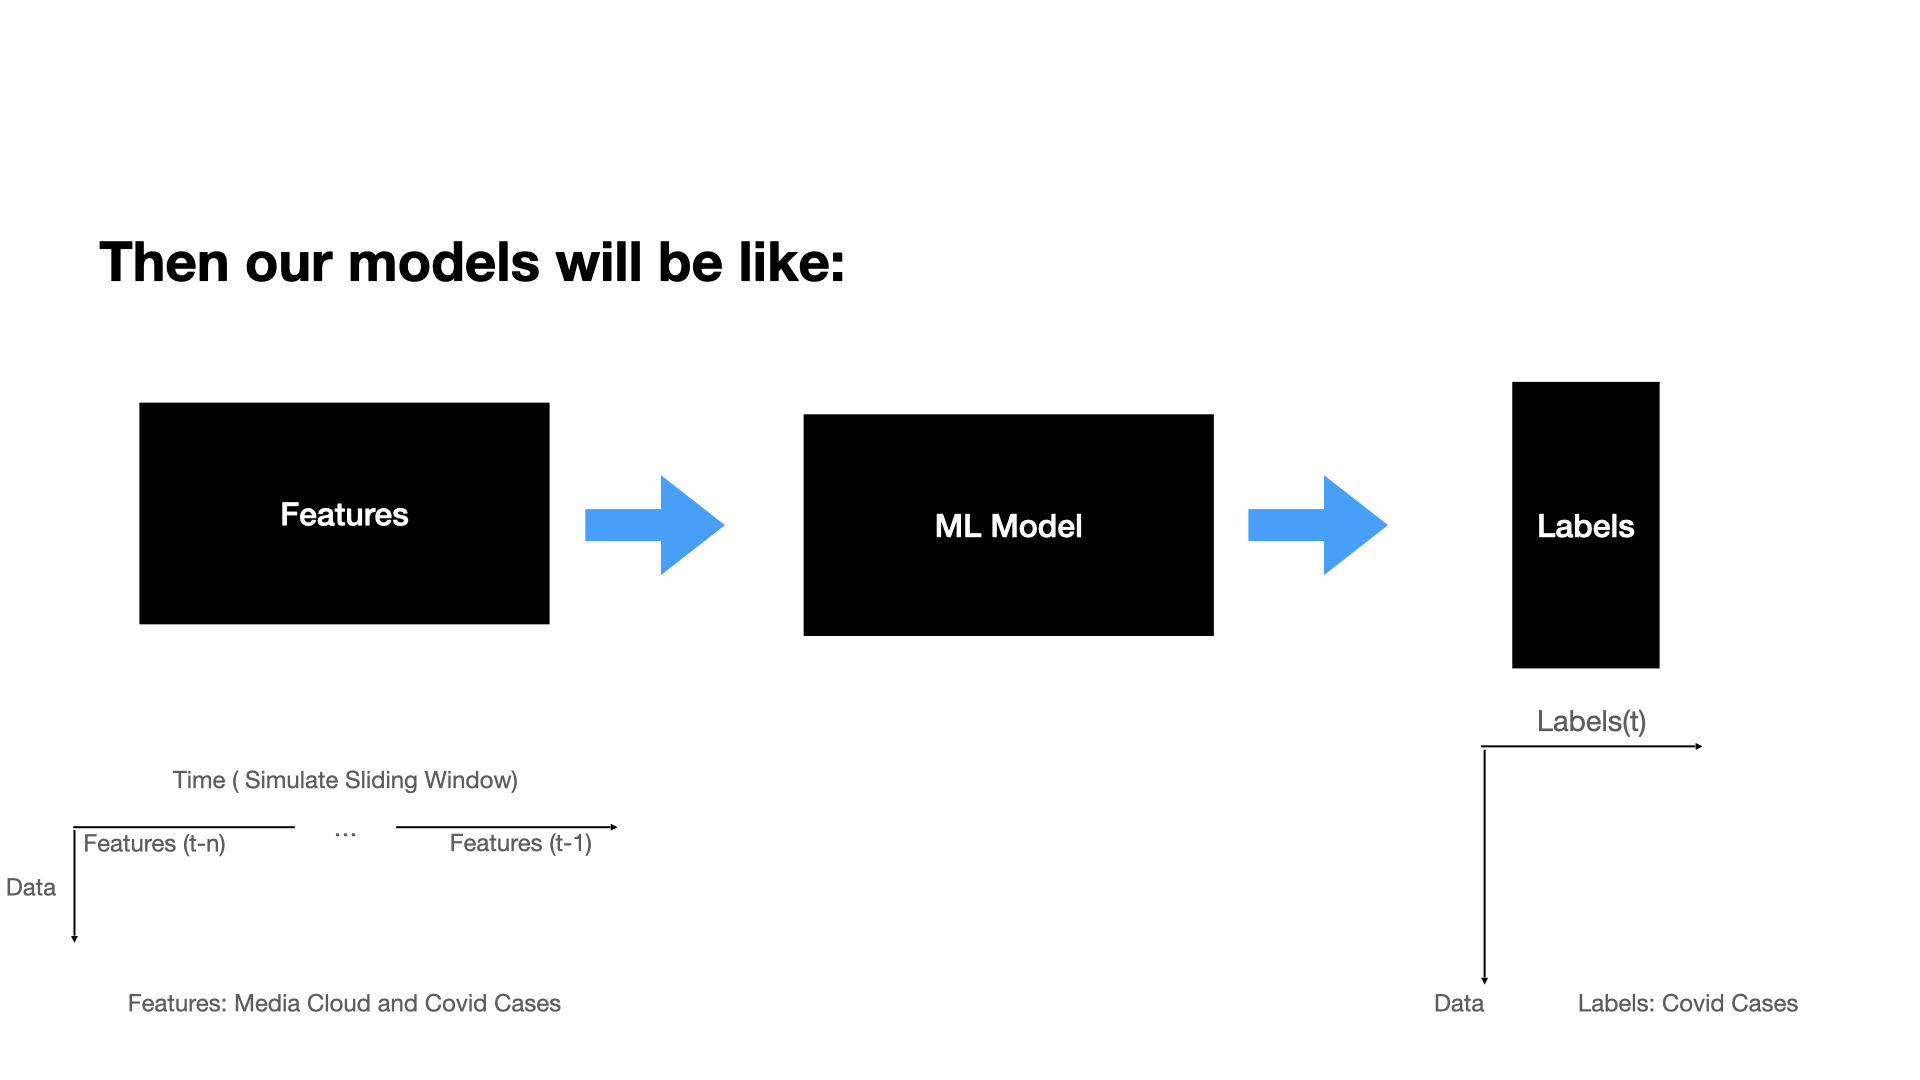

### 3.2.2. Train Test split

In [23]:
def train_test_split(df, train_percentage = 90):
    # We need a sequence so we can't split randomly
    # To divide into Train and test we have to calculate the train percentage of the dataset:
    size = df.shape[0]
    split = int(size*(train_percentage/100))
    
    """ Train """
    # We will train with 1st percentage % of data and test with the rest
    train_df = df.iloc[:split,:] ## percentage % train
    
    """ Test """
    test_df = df.iloc[split:,:] # 100 - percentage % test
    
    print(f'The train shape is: {train_df.shape}')
    print(f'The test shape is: {test_df.shape}')
    
    return train_df, test_df

In [24]:
train_df, test_df = train_test_split(covid_df, train_percentage = 90)

The train shape is: (741, 2)
The test shape is: (83, 2)


### 3.2.3. Normalize features
As we are working with a Neural Network the data values ​​must be normalized to help backpropagation algorithm So we will use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a> from sklearn

In [25]:
# Normalize train data and create the scaler
def normalize_train_features(df, feature_range=(-1, 1)):
    
    scalers = {}
    # For each column in the dataframe
    for column in df.columns:
        # Get values of the column
        values = df[column].values.reshape(-1,1)
        # Generate a new scaler
        scaler = MinMaxScaler(feature_range=feature_range)
        # Fit the scaler just for that column
        scaled_column = scaler.fit_transform(values)
        # Add the scaled column to the dataframe
        scaled_column = np.reshape(scaled_column, len(scaled_column))
        df[column] = scaled_column
        
        # Save the scaler of the column
        scalers['scaler_' + column] = scaler
        
    print(f' Min values are: ')
    print(df.min())
    print(f' Max values are: ')
    print(df.max())
        
    return df, scalers


""" If you want to use the same scaler used in train, you can use this function"""
def normalize_test_features(df, scalers=None):
    
    if not scalers:
        raise TypeError("You should provide a list of scalers.")
        
    for column in df.columns:
        # Get values of the column
        values = df[column].values.reshape(-1,1)
        # Take the scaler of that column
        scaler = scalers['scaler_' + column]
        # Scale values
        scaled_column = scaler.transform(values)
        scaled_column = np.reshape(scaled_column,len(scaled_column))
        # Add the scaled values to the df
        df[column] = scaled_column
        
    print(f' Min values are: ')
    print(df.min())
    print(f' Max values are: ')
    print(df.max())
        
    return df 

In [26]:
feature_range = (-1, 1)

# Scale train:
train_df, scalers = normalize_train_features(train_df, feature_range=feature_range)

print(f'The scalers are: {scalers}')

train_df.head()

 Min values are: 
ratio_Chile   -1.0
Cases         -1.0
dtype: float64
 Max values are: 
ratio_Chile    1.0
Cases          1.0
dtype: float64
The scalers are: {'scaler_ratio_Chile': MinMaxScaler(feature_range=(-1, 1)), 'scaler_Cases': MinMaxScaler(feature_range=(-1, 1))}


,ratio_Chile,Cases
date,,
2020-02-23,-0.858099,-0.999904
2020-02-24,-0.830103,-1.000000
2020-02-25,-0.756634,-1.000000
2020-02-26,-0.801901,-1.000000
2020-02-27,-0.705836,-1.000000


In [27]:
# Scale test:
test_df = normalize_test_features(test_df, scalers=scalers)
test_df.head()

 Min values are: 
ratio_Chile   -0.987204
Cases         -1.000000
dtype: float64
 Max values are: 
ratio_Chile   -0.454692
Cases          0.003625
dtype: float64


,ratio_Chile,Cases
date,,
2022-03-05,-0.740864,0.003625
2022-03-06,-0.753290,-0.034213
2022-03-07,-0.681003,-0.322273
2022-03-08,-0.762743,-0.435116
2022-03-09,-0.727181,-0.209287


### 3.2.4. Prepare data to supervised learning time series (function to create sliding window)

we will use:

* data: is the dataframe in our case (Covid Cases + Media CloudData)
* n_in: is the number of lag weeks in the past (length of window)

The heart of this "series_to_supervised" function is the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html">shift</a> function of pandas

This function gets as input the number of periods (in this case the number of days represented as rows up or down in the dataframe) to move the columns of a dataframe. E.g.

- If we have df.shift(1) all the rows will move one row down
- If we have df.shift(-1) all the rows will move one row up

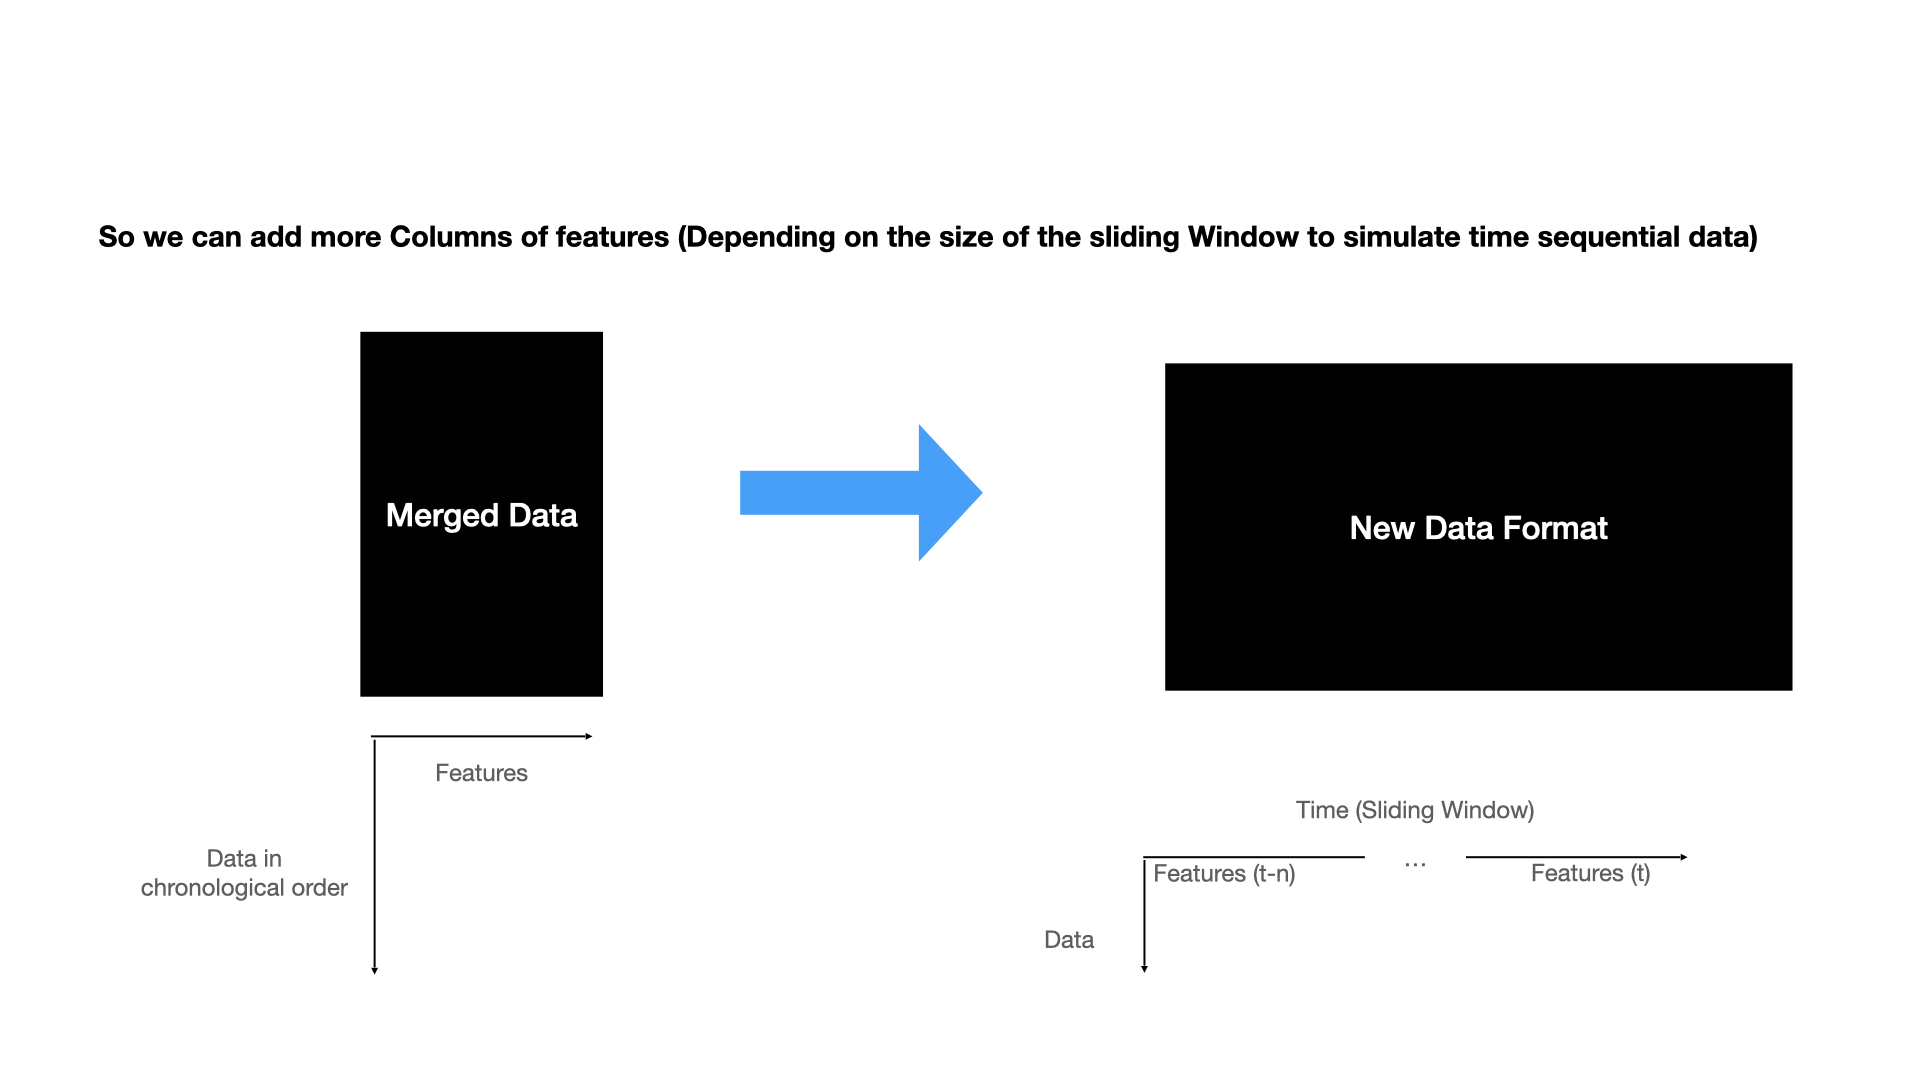

In [28]:
# prepare data for time series

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, autoregressive=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        if not autoregressive:
            cols.append(df.shift(i).iloc[:,:-1])
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars-1)]
        else:
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [29]:
# length of window
days = 7

# frame as supervised learning
train = series_to_supervised(train_df, n_in=days)
test = series_to_supervised(test_df, n_in=days)

DataFrame(train)

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
date,,,,,,,,,,,,,,,,
2020-03-01,-0.858099,-0.999904,-0.830103,-1.000000,-0.756634,-1.000000,-0.801901,-1.000000,-0.705836,-1.000000,-0.890490,-1.000000,-0.786212,-1.000000,-0.760558,-0.999664
2020-03-02,-0.830103,-1.000000,-0.756634,-1.000000,-0.801901,-1.000000,-0.705836,-1.000000,-0.890490,-1.000000,-0.786212,-1.000000,-0.760558,-0.999664,-0.793456,-1.000000
2020-03-03,-0.756634,-1.000000,-0.801901,-1.000000,-0.705836,-1.000000,-0.890490,-1.000000,-0.786212,-1.000000,-0.760558,-0.999664,-0.793456,-1.000000,-0.694715,-0.999952
2020-03-04,-0.801901,-1.000000,-0.705836,-1.000000,-0.890490,-1.000000,-0.786212,-1.000000,-0.760558,-0.999664,-0.793456,-1.000000,-0.694715,-0.999952,-0.740095,-1.000000
2020-03-05,-0.705836,-1.000000,-0.890490,-1.000000,-0.786212,-1.000000,-0.760558,-0.999664,-0.793456,-1.000000,-0.694715,-0.999952,-0.740095,-1.000000,-0.635646,-0.999856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,-0.557674,0.203957,-0.716206,-0.064801,-0.738269,0.210055,-0.828830,0.573263,-0.776013,0.535521,-0.685483,0.428874,-0.766516,0.237425,-0.837486,-0.057934
2022-03-01,-0.716206,-0.064801,-0.738269,0.210055,-0.828830,0.573263,-0.776013,0.535521,-0.685483,0.428874,-0.766516,0.237425,-0.837486,-0.057934,-0.787896,-1.000000
2022-03-02,-0.738269,0.210055,-0.828830,0.573263,-0.776013,0.535521,-0.685483,0.428874,-0.766516,0.237425,-0.837486,-0.057934,-0.787896,-1.000000,-0.803871,0.781038


### 3.2.5 Features and Labels Set

In [30]:
def features_labels_set(timeseries_data, original_df):
    
    """ Features """
    # We define the number of features as (Cases and media cloud)
    n_features = original_df.shape[1]

    # The features to train the model will be all except the values of the actual week 
    # We can't use other variables in week t because whe need to resample a a 3D Array
    features_set = DataFrame(timeseries_data.values[:,:-n_features])
    # Convert pandas data frame to np.array to reshape as 3D Array
    features_set = features_set.to_numpy()
    print(f'The shape of the features is {features_set.shape}')
    
    """ Labels """
    # We will use Covid cases in last week 
    labels_set = DataFrame(timeseries_data.values[:,-1])
    # Convert pandas data frame to np.array
    labels_set = labels_set.to_numpy()
    print(f'The shape of the labels is {labels_set.shape}')
    
    return features_set, labels_set, n_features

In [31]:
# Train features and labels set
train_X, train_y, n_features = features_labels_set(timeseries_data=train, original_df=covid_df)

The shape of the features is (734, 14)
The shape of the labels is (734, 1)


In [32]:
# Test features and labels set
test_X, test_y, n_features = features_labels_set(timeseries_data=test, original_df=covid_df)

The shape of the features is (76, 14)
The shape of the labels is (76, 1)


# 4. Modeling

## 4.1 Classical Machine Learning Approach

Classical machine learning approach is based in classic machine learning models, but changing the structure of the data by adding the sliding window

## 4.2 Deep Learning Approach

Deep Learning approach uses models created to analyze sequences such as those based on Recurrent Neural Networks (RNN) or more recently transformers

## 4.1 Classical Machine Learning Approach

We define the:
* Model architecture. In this case, the models will be a Linear Regression and a Multi-layer Perceptron (MLP).
* Model optimizer (for MLP). In this case for speed of convergence we will use the adam optimizer.

### 4.1.1. Define and Train The Model

#### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

# Define the model (Linear Regression)
regression = LinearRegression()

# Train the model
regression = regression.fit(train_X, train_y)
regression

LinearRegression()

#### Multi-layer Perceptron

In [34]:
from sklearn.neural_network import MLPRegressor

# Define the model (Multi-layer Perceptron)
mlp = MLPRegressor(random_state=1, hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# Train the model
mlp = mlp.fit(train_X, train_y)
mlp

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=1)

## 4.2. Deep Learning Approach

We define the:
* Model architecture. In this case, the model is an LSTM neural network.
* Model Loss function. In this case as we are in a regression task, we will use Mean Absolute Error (MAE).
* Model optimizer. In this case for speed of convergence we will use the adam optimizer.

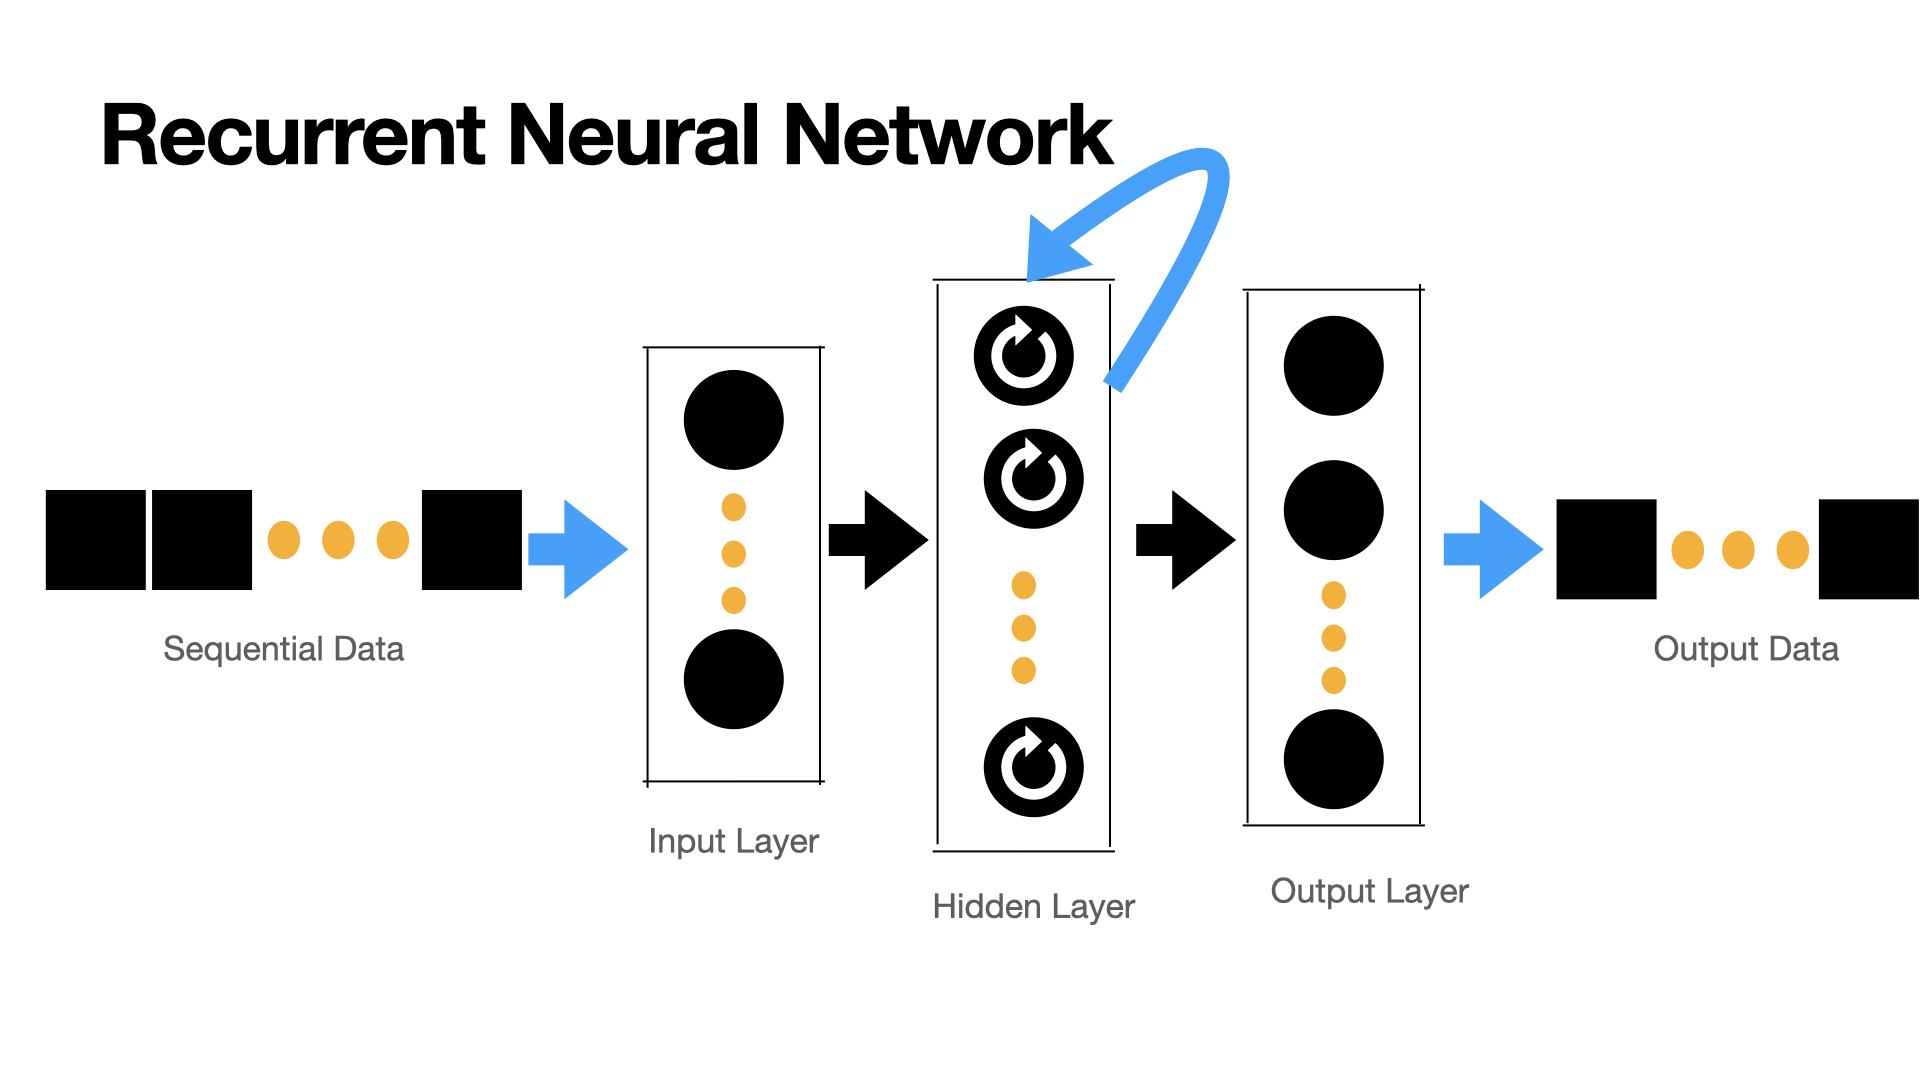

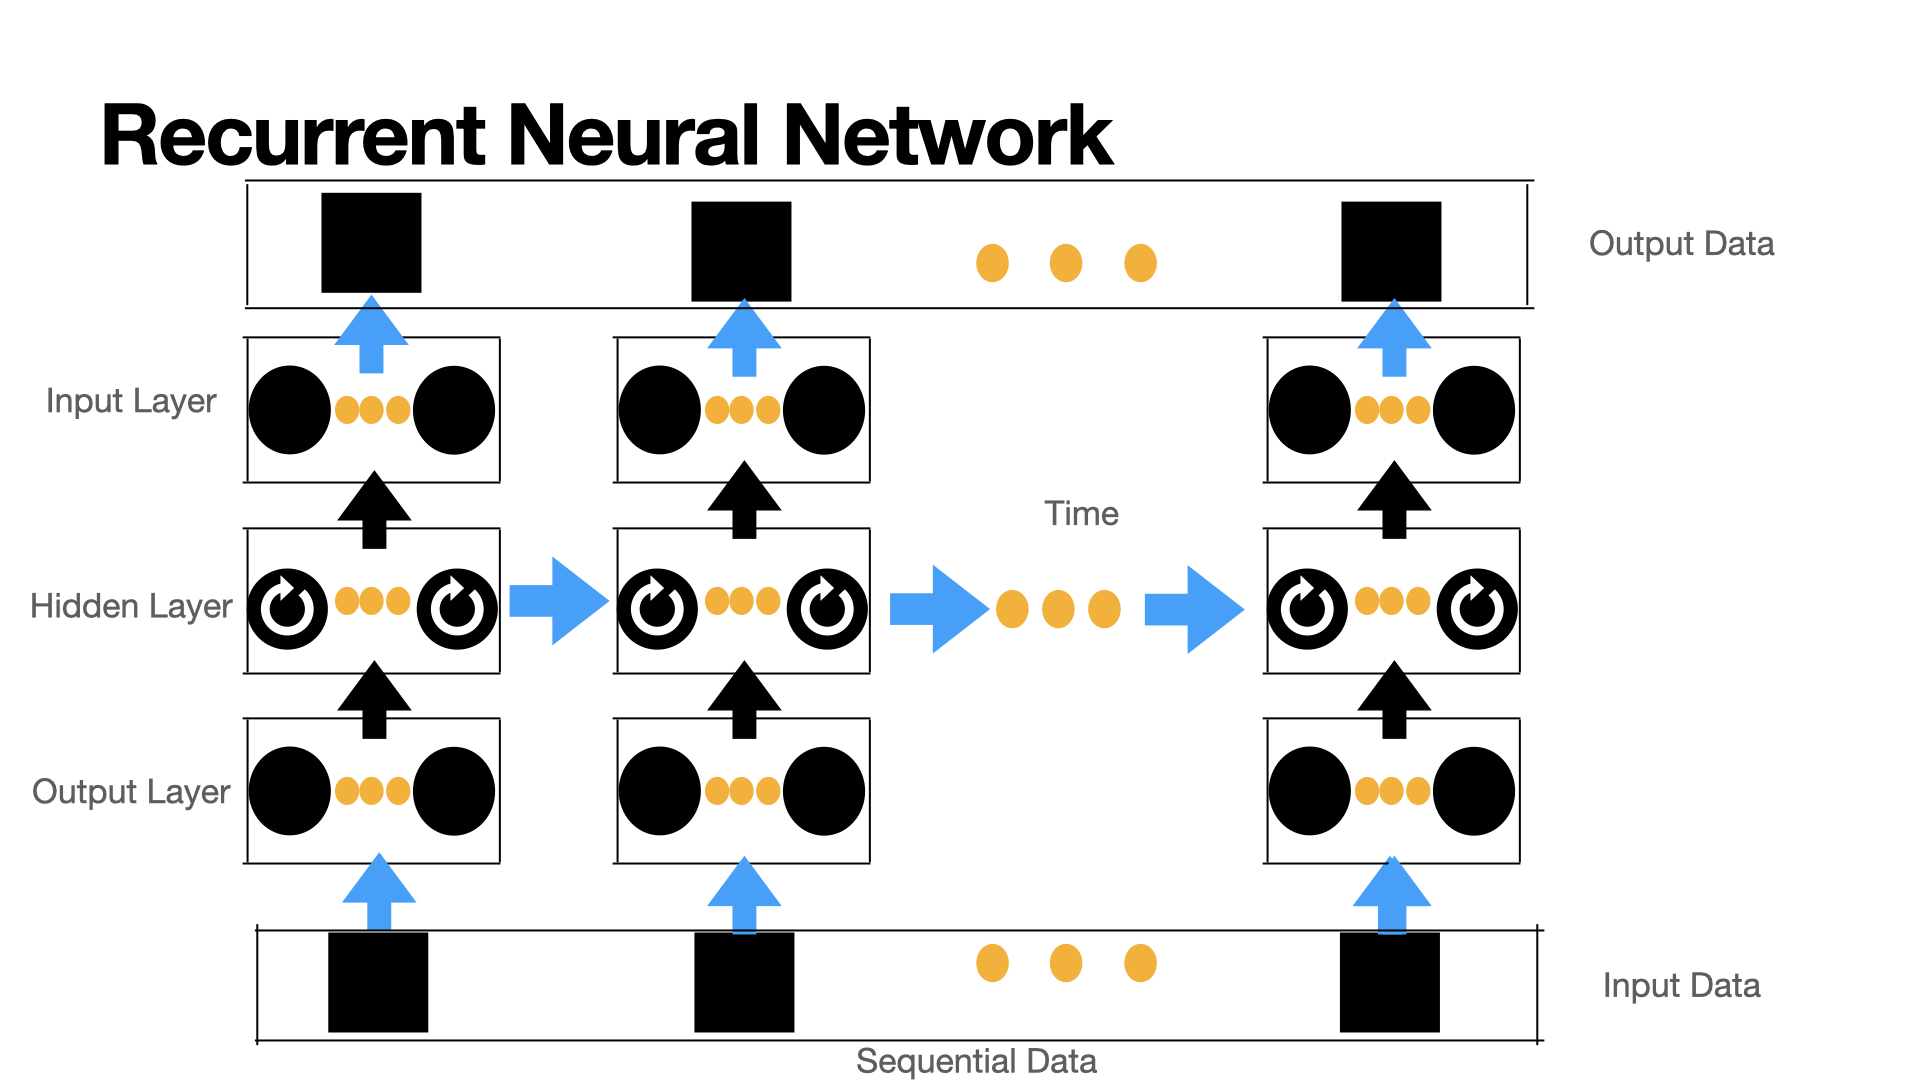

### 4.2.1. Reshape to tensor

As we will use an LSTM the input is given as a 3D tensor of shape:
* features shape: `(n_instances, sliding_window_length, input_variables)`
* Labels shape: `(n_instances, n_output_labels (one week ahead this case = 1))`

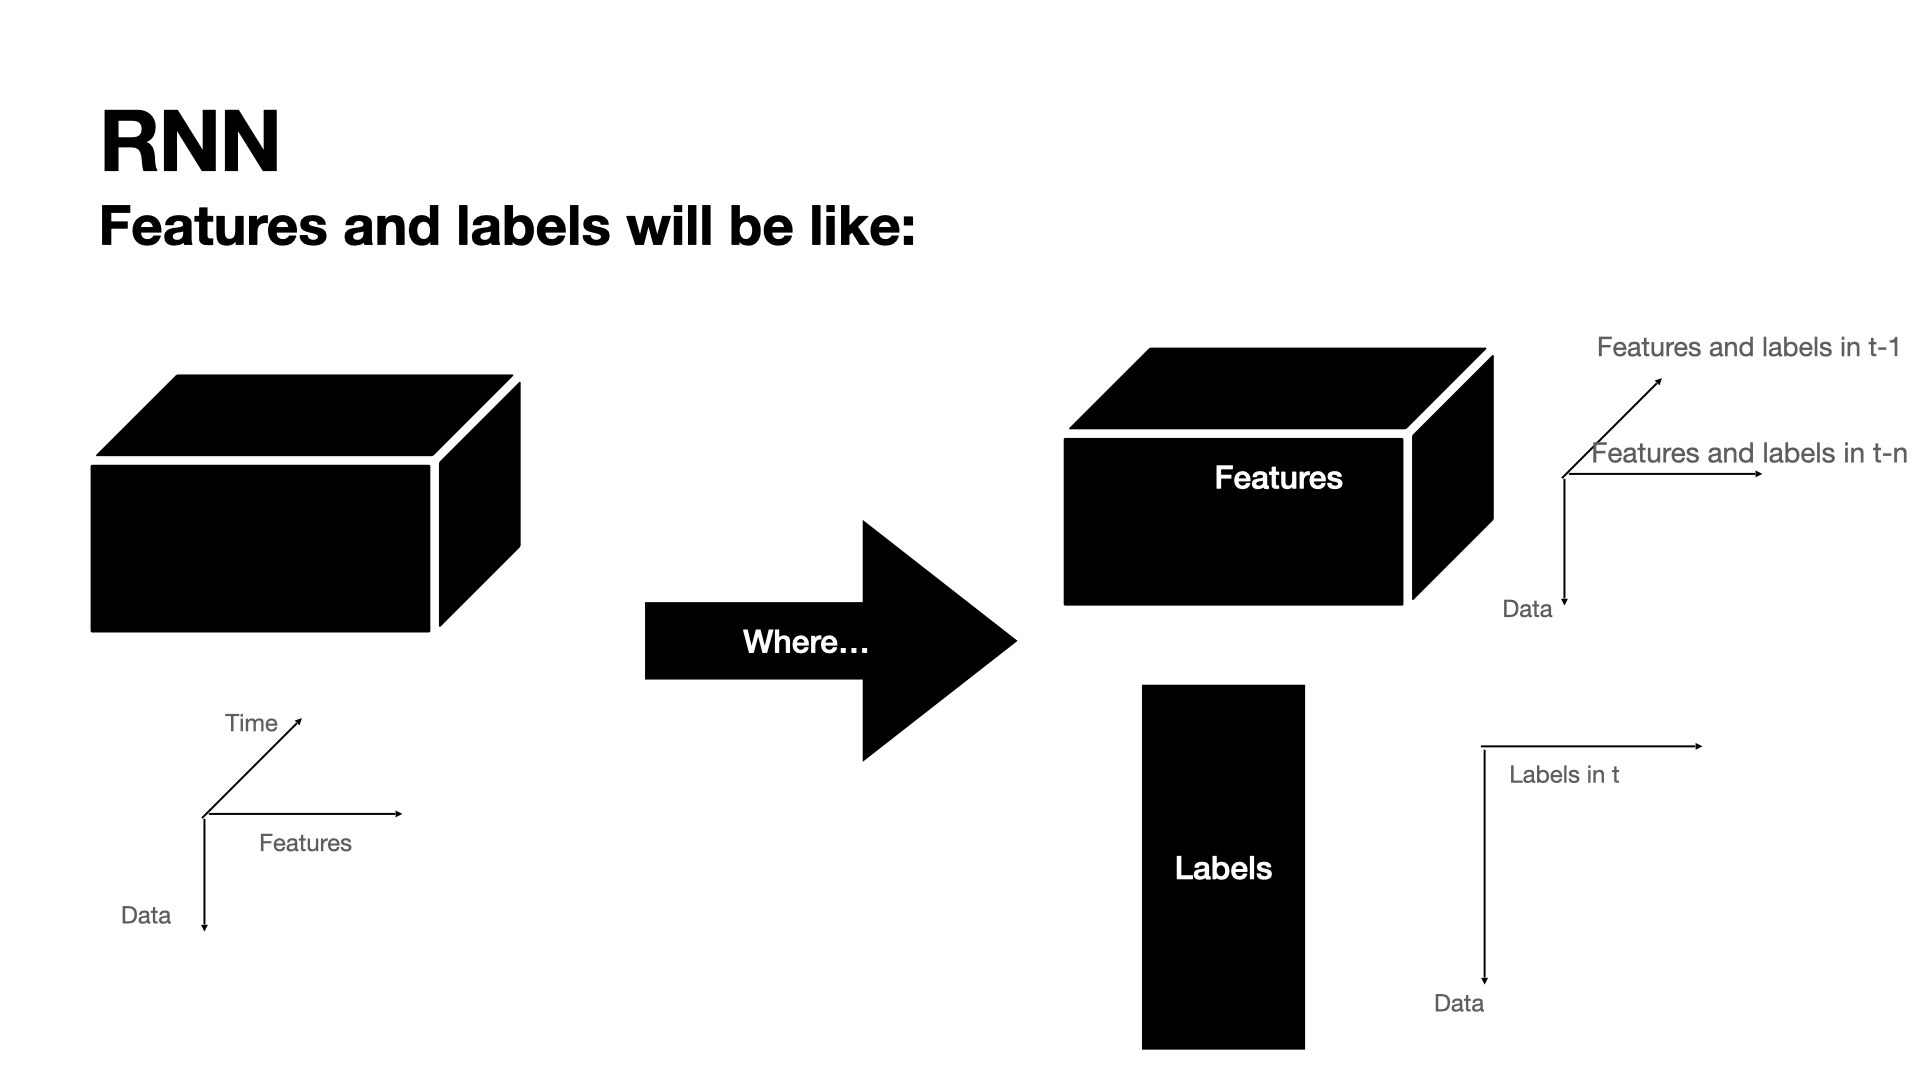

In [35]:
def reshape_tensor(train_X, test_X, n_features):
    print('The initial shapes are:')
    print(f'The train shape is {train_X.shape}')
    print(f'The test shape is {test_X.shape}')
    
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], days, n_features))
    test_X = test_X.reshape((test_X.shape[0], days, n_features))
    
    print('-----------------------')
    print('The Final shapes are:')
    print(f'The train shape is {train_X.shape}')
    print(f'The test shape is {test_X.shape}')
    
    return train_X, test_X

In [36]:
# reshape input to be 3D [samples, timesteps, features]
train_X, test_X = reshape_tensor(train_X, test_X, n_features)

The initial shapes are:
The train shape is (734, 14)
The test shape is (76, 14)
-----------------------
The Final shapes are:
The train shape is (734, 7, 2)
The test shape is (76, 7, 2)


### 4.2.2. Define the Model

### 4.2.2.1. Define the Model - LSTM

In [37]:
# Set Seed
tf.random.set_seed(0)

# design network
model = Sequential()
model.add(LSTM(120, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(240, input_shape=(train_X.shape[1], 120)))
model.add(Dense(60))
model.add(Dense(1))

# Compile the model
model.compile(loss='mae', optimizer='adam')

# Print the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 120)            59040     
                                                                 
 lstm_1 (LSTM)               (None, 240)               346560    
                                                                 
 dense (Dense)               (None, 60)                14460     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 420,121
Trainable params: 420,121
Non-trainable params: 0
_________________________________________________________________


### 4.2.2.2. Define the Model - Transformer

<img src="https://www.researchgate.net/publication/342045332/figure/fig2/AS:900500283215874@1591707406300/Transformer-Model-Architecture-Transformer-Architecture-26-is-parallelized-for-seq2seq.png" alt="Transformer Architecture" width="500"/>



In [38]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [39]:
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0,):

    inputs = keras.Input(shape=input_shape)
    x = inputs

    # Transformer encoder blocks
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

    # Classifier / Regressor
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [40]:
# Create the transformer
transformer = build_model(input_shape=train_X.shape[1:], head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=2, mlp_units=[128, 64], mlp_dropout=0.4, dropout=0.25)

# Compile the model
transformer.compile(loss='mae', optimizer='adam')

# Print the transformer
transformer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 7, 2)        4           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 7, 2)        11266       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

### 4.2.3. Train the model

### 4.2.3.1. Train the LSTM model

In [41]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
11/11 - 9s - loss: 0.3227 - val_loss: 0.1201 - 9s/epoch - 774ms/step
Epoch 2/50
11/11 - 1s - loss: 0.1160 - val_loss: 0.0749 - 904ms/epoch - 82ms/step
Epoch 3/50
11/11 - 1s - loss: 0.0628 - val_loss: 0.0808 - 785ms/epoch - 71ms/step
Epoch 4/50
11/11 - 1s - loss: 0.0688 - val_loss: 0.0942 - 776ms/epoch - 71ms/step
Epoch 5/50
11/11 - 1s - loss: 0.0875 - val_loss: 0.0814 - 754ms/epoch - 69ms/step
Epoch 6/50
11/11 - 1s - loss: 0.0547 - val_loss: 0.0704 - 818ms/epoch - 74ms/step
Epoch 7/50
11/11 - 1s - loss: 0.0585 - val_loss: 0.1291 - 789ms/epoch - 72ms/step
Epoch 8/50
11/11 - 1s - loss: 0.0666 - val_loss: 0.0740 - 868ms/epoch - 79ms/step
Epoch 9/50
11/11 - 1s - loss: 0.0609 - val_loss: 0.0903 - 719ms/epoch - 65ms/step
Epoch 10/50
11/11 - 0s - loss: 0.0719 - val_loss: 0.0707 - 486ms/epoch - 44ms/step
Epoch 11/50
11/11 - 0s - loss: 0.0547 - val_loss: 0.0756 - 446ms/epoch - 41ms/step
Epoch 12/50
11/11 - 0s - loss: 0.0682 - val_loss: 0.0956 - 459ms/epoch - 42ms/step
Epoch 13/50
11/

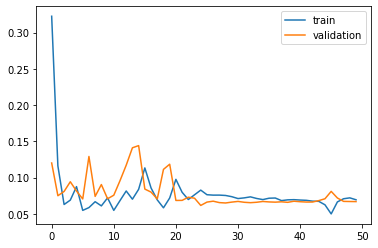

In [42]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

### 4.2.3.2. Train the transformer model

In [43]:
# fit network
history = transformer.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
11/11 - 3s - loss: 0.5541 - val_loss: 0.1329 - 3s/epoch - 265ms/step
Epoch 2/50
11/11 - 1s - loss: 0.3145 - val_loss: 0.2888 - 619ms/epoch - 56ms/step
Epoch 3/50
11/11 - 1s - loss: 0.2715 - val_loss: 0.2341 - 618ms/epoch - 56ms/step
Epoch 4/50
11/11 - 1s - loss: 0.2749 - val_loss: 0.1837 - 616ms/epoch - 56ms/step
Epoch 5/50
11/11 - 1s - loss: 0.2349 - val_loss: 0.2417 - 602ms/epoch - 55ms/step
Epoch 6/50
11/11 - 1s - loss: 0.2269 - val_loss: 0.2880 - 612ms/epoch - 56ms/step
Epoch 7/50
11/11 - 1s - loss: 0.2232 - val_loss: 0.3322 - 635ms/epoch - 58ms/step
Epoch 8/50
11/11 - 1s - loss: 0.2390 - val_loss: 0.2895 - 599ms/epoch - 54ms/step
Epoch 9/50
11/11 - 1s - loss: 0.2007 - val_loss: 0.2278 - 613ms/epoch - 56ms/step
Epoch 10/50
11/11 - 1s - loss: 0.2024 - val_loss: 0.2678 - 598ms/epoch - 54ms/step
Epoch 11/50
11/11 - 1s - loss: 0.2289 - val_loss: 0.2759 - 613ms/epoch - 56ms/step
Epoch 12/50
11/11 - 1s - loss: 0.1636 - val_loss: 0.2641 - 628ms/epoch - 57ms/step
Epoch 13/50
11/

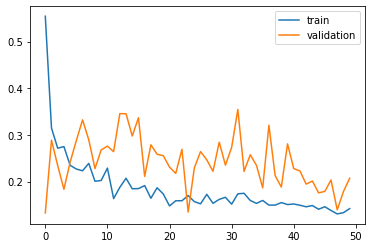

In [44]:
from matplotlib import pyplot
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

# 5. Test the model

## 5.1. Predict test output using the model and unnormalize the output data

In [45]:
print(f'The scalers are: {scalers.keys()}')
y_scaler = scalers['scaler_Cases']

The scalers are: dict_keys(['scaler_ratio_Chile', 'scaler_Cases'])


In [46]:
from math import sqrt
from numpy import concatenate

def test_model(model, test_X, test_y, scaler, rnn = None):
    
    # If model is a classical machine learning model and test_X is a 3D tensor, then convert to 2D
    if not rnn and (len(test_X.shape) == 3):
        test_X = test_X.reshape((test_X.shape[0], -1))
    
    # do the prediction
    yhat = model.predict(test_X)
    
    # Invert scaling for forecast
    # Inverse Scaler
    
    # Predicted
    if not rnn:
        yhat = yhat.reshape(-1, 1)
    
    inv_yhat = scaler.inverse_transform(yhat)
    
    # Real:
    inv_y = scaler.inverse_transform(test_y)
    
    return inv_yhat, inv_y

In [47]:
# With classic ML approach
inv_yhat, inv_y = test_model(model=mlp, test_X=test_X, test_y=test_y, scaler=y_scaler)

# With LSTM:
inv_yhat_lstm, inv_y_lstm = test_model(model=model, test_X=test_X, test_y=test_y, scaler=y_scaler, rnn = True)

# With Transformer:
inv_yhat_transformer, inv_y_transformer = test_model(model=transformer, test_X=test_X, test_y=test_y, scaler=y_scaler, rnn = True)

3/3 [==============================] - 0s 10ms/step


## 5.2. Error functions

### Mean Absolute Percentage Error (MAPE)

$$
MAPE = \displaystyle\frac{100\%}{n}\sum_{t=1}^{n}\left |\frac{x_i-y_i}{y_t}\right|
$$

MAPE has a problem if there are zeros in the test data, so other metrics can be explored

In [48]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Test MAPE: %.3f' % mape)

In [49]:
# calculate MAPE
print('--- MLP ---')
mean_absolute_percentage_error(inv_y, inv_yhat)

print('--- LSTM ---')
mean_absolute_percentage_error(inv_y_lstm, inv_yhat_lstm)

print('--- Transformer ---')
mean_absolute_percentage_error(inv_yhat_transformer, inv_y_transformer)

--- MLP ---
Test MAPE: inf
--- LSTM ---
Test MAPE: inf
--- Transformer ---
Test MAPE: 42.813


### Symmetric Mean Absolute Percentage Error (sMAPE)

$$
sMAPE = \displaystyle\frac{100\%}{n}\sum_{t=1}^{n} \frac{|x_i-y_i|}{|x_i|+|y_t|}
$$

In [50]:
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    smape = 1/len(y_true) * np.sum(2 * np.abs(y_pred-y_true) / (np.abs(y_true) + np.abs(y_pred))*100)
    print('Test sMAPE: %.3f' % smape)

In [51]:
# calculate sMAPE
print('--- MLP ---')
symmetric_mean_absolute_percentage_error(inv_y, inv_yhat)

print('--- LSTM ---')
symmetric_mean_absolute_percentage_error(inv_y_lstm, inv_yhat_lstm)

print('--- Transformer ---')
symmetric_mean_absolute_percentage_error(inv_yhat_transformer, inv_y_transformer)

--- MLP ---
Test sMAPE: 38.360
--- LSTM ---
Test sMAPE: 32.518
--- Transformer ---
Test sMAPE: 56.325


### Mean Absoulte Error (MAE)
$$
MAE = \sum_{i=1}^{D}|x_i-y_i|
$$

In [52]:
from sklearn.metrics import  mean_absolute_error

# calculate MAE
print('--- MLP ---')
mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

print('--- LSTM ---')
mae = mean_absolute_error(inv_y_lstm, inv_yhat_lstm)
print('Test MAE: %.3f' % mae)

print('--- Transformer ---')
mae = mean_absolute_error(inv_y_transformer, inv_yhat_transformer)
print('Test MAE: %.3f' % mae)

--- MLP ---
Test MAE: 108.790
--- LSTM ---
Test MAE: 72.387
--- Transformer ---
Test MAE: 224.639


## 5.3. Plot predicted vs actual covid cases

In [53]:
def plot_predictions(inv_y, inv_yhat, model_name = ''):
    data_predict = inv_yhat  ## predicted target  cases
    dataY_plot = inv_y  ##  real test-target cases

    data_predict = data_predict.reshape(len(data_predict), 1)
    dataY_plot = dataY_plot.reshape(len(dataY_plot), 1)

    plt.plot(dataY_plot, label = 'actual')
    plt.plot(data_predict, label = 'predicted')
    plt.legend(loc="upper left")

    plt.suptitle(f'Time-Series Prediction with {model_name}')
    plt.show()

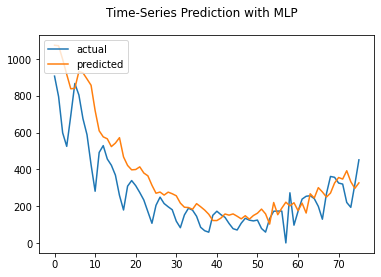

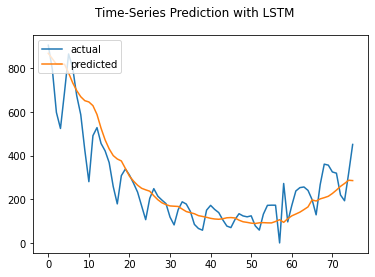

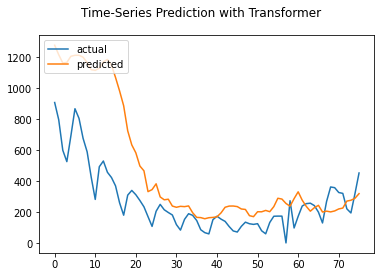

In [54]:
# MLP
plot_predictions(inv_y, inv_yhat, model_name = 'MLP')

# LSTM
plot_predictions(inv_y_lstm, inv_yhat_lstm, model_name = 'LSTM')

# Transformer
plot_predictions(inv_y_transformer, inv_yhat_transformer, model_name = 'Transformer')

Any question:

David Restrepo: dsrestrepo@unicauca.edu.co or dsrestrepo2@gmail.com 

